In [1]:
import pandas as pd

dataset = pd.read_csv("YRBS_rev2.csv")

In [2]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q95,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,1,88.16,4.97,111,270530,5,2015
1,7,2,4,1,1,1,1,1,1,1.73,...,8,1,1,1,67.56,3.93,111,270530,7,2015
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,1,11.21,5.01,111,270530,9,2015
3,4,2,2,1,1,1,1,1,2,1.78,...,4,1,2,1,68.28,4.02,111,270530,13,2015
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,1,3,68.88,4.01,111,270530,15,2015


In [3]:
colq88 = dataset["q88"]
dataset.drop(labels=['q88'], axis=1, inplace = True)
dataset.insert(123, 'q88', colq88)

In [4]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year,q88
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,88.16,4.97,111,270530,5,2015,1
1,7,2,4,1,1,1,1,1,1,1.73,...,1,1,1,67.56,3.93,111,270530,7,2015,3
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,11.21,5.01,111,270530,9,2015,2
3,4,2,2,1,1,1,1,1,2,1.78,...,1,2,1,68.28,4.02,111,270530,13,2015,4
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,3,68.88,4.01,111,270530,15,2015,4


In [5]:
dataset.drop(labels=['q6', 'q7','q8','q9','q10','q11', 'q12', 'q13','q14', 'q15', 'q16', 'q17',
                     'q18', 'q19', 'q21', 'q22','q29','q30', 'q32','q33','q37', 'q38','q40', 'q42','q43','q46','q47',
                     'q48','q49','q50','q51','q52','q53','q54','q55',
                     'q56','q57','q59','q62','q61','q63','q67','q69','q70','q71','q72','q73','q74','q75',
                     'q76','q81','q82','q84','q86','q87','q91','q92','q93','q94','q95','q96',
                     'q99','BMIPCT'], axis=1, inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15307 entries, 0 to 15306
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       15307 non-null  int64  
 1   q2       15307 non-null  int64  
 2   q3       15307 non-null  int64  
 3   q4       15307 non-null  int64  
 4   q5_1     15307 non-null  int64  
 5   q5_2     15307 non-null  int64  
 6   q5_3     15307 non-null  int64  
 7   q5_4     15307 non-null  int64  
 8   q5_5     15307 non-null  int64  
 9   q23      15307 non-null  int64  
 10  q24      15307 non-null  int64  
 11  q25      15307 non-null  int64  
 12  q26      15307 non-null  int64  
 13  q27      15307 non-null  int64  
 14  q28      15307 non-null  int64  
 15  q35      15307 non-null  int64  
 16  q36_2    15307 non-null  int64  
 17  q36_3    15307 non-null  int64  
 18  q36_4    15307 non-null  int64  
 19  q36_5    15307 non-null  int64  
 20  q36_6    15307 non-null  int64  
 21  q36_7    153

In [7]:
dataset['q88'] = dataset.q88.astype('category')

In [8]:
y = dataset["q88"]
X = dataset.drop(labels=['q88'], axis=1, inplace = True)
X = dataset

In [9]:
#time = 35.00

y.unique()

[1, 3, 2, 4, 6, 5, 7]
Categories (7, int64): [1, 3, 2, 4, 6, 5, 7]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
clf_dt= tree_clf.fit(X_train, y_train)

[Text(347.6896125639856, 402.03749999999997, 'X[11] <= 1.5\ngini = 0.784\nsamples = 12245\nvalue = [847, 1590, 3041, 3726, 2376, 540, 125]'),
 Text(127.94570014753067, 390.7125, 'X[49] <= 2.5\ngini = 0.796\nsamples = 3938\nvalue = [502, 740, 1088, 959, 500, 116, 33]'),
 Text(43.391805076712366, 379.3875, 'X[12] <= 1.5\ngini = 0.79\nsamples = 1003\nvalue = [222, 251, 248, 174, 81, 17, 10]'),
 Text(30.165147909132617, 368.0625, 'X[24] <= 3.5\ngini = 0.779\nsamples = 505\nvalue = [156, 109, 111, 82, 33, 8, 6]'),
 Text(26.879008507853403, 356.7375, 'X[55] <= 2.49\ngini = 0.784\nsamples = 456\nvalue = [130, 105, 99, 79, 30, 7, 6]'),
 Text(23.077604644572784, 345.4125, 'X[53] <= 3.5\ngini = 0.785\nsamples = 422\nvalue = [112, 101, 97, 73, 27, 7, 5]'),
 Text(18.948429994062717, 334.0875, 'X[36] <= 1.5\ngini = 0.788\nsamples = 359\nvalue = [85, 85, 89, 66, 24, 6, 4]'),
 Text(14.003083337831272, 322.7625, 'X[43] <= 1.5\ngini = 0.788\nsamples = 326\nvalue = [83, 70, 80, 61, 23, 6, 3]'),
 Text(9.

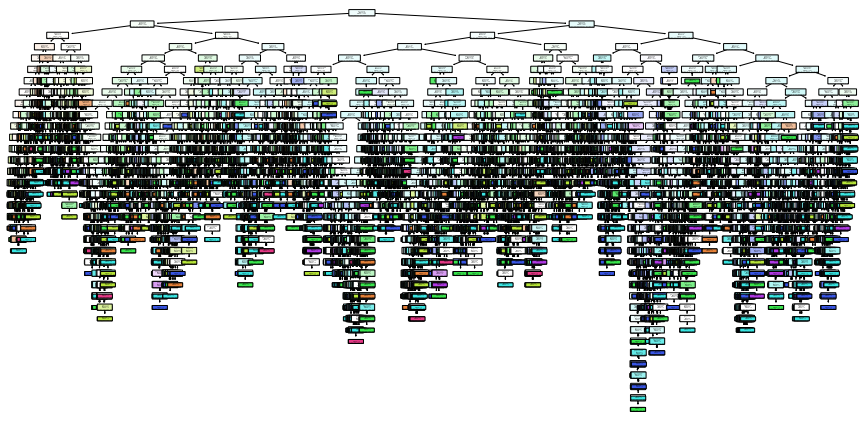

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7.5))

plot_tree(clf_dt,
         filled=True,
         rounded=True)

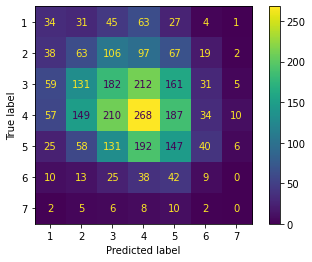

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test)

Cost Complexity Pruning:

In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

In [14]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
ccp_alaphas = ccp_alphas[:-1]

clf_dts = []

In [15]:
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Visualize Alpha:

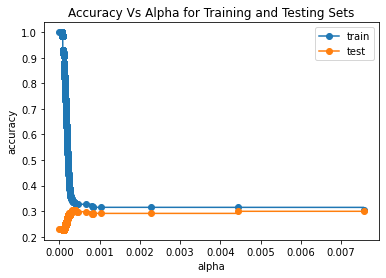

In [16]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy Vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

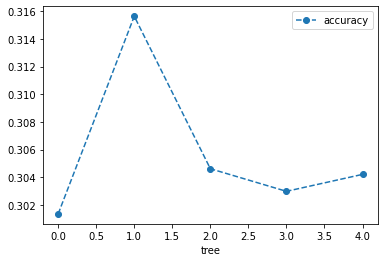

In [17]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.0075)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Cross Validation:

<AxesSubplot:xlabel='alpha'>

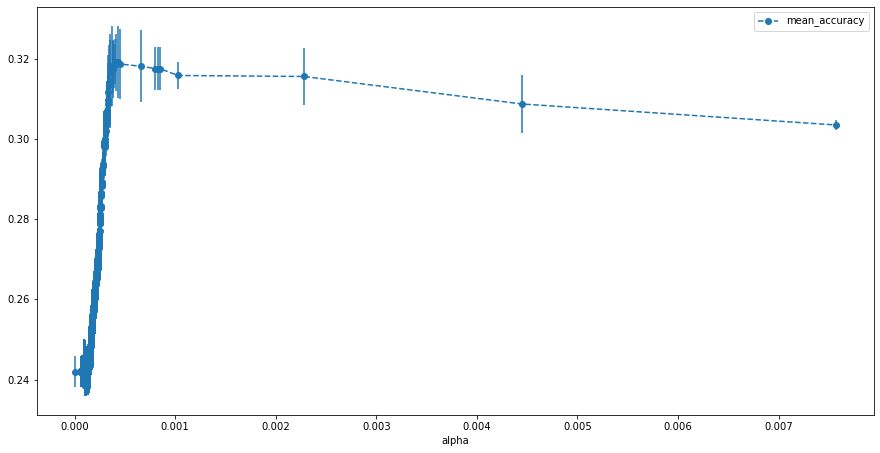

In [18]:
import numpy as np

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                  y='mean_accuracy',
                  yerr= 'std',
                  marker='o',
                  linestyle='--',
                  figsize=(15, 7.5))

<AxesSubplot:xlabel='alpha'>

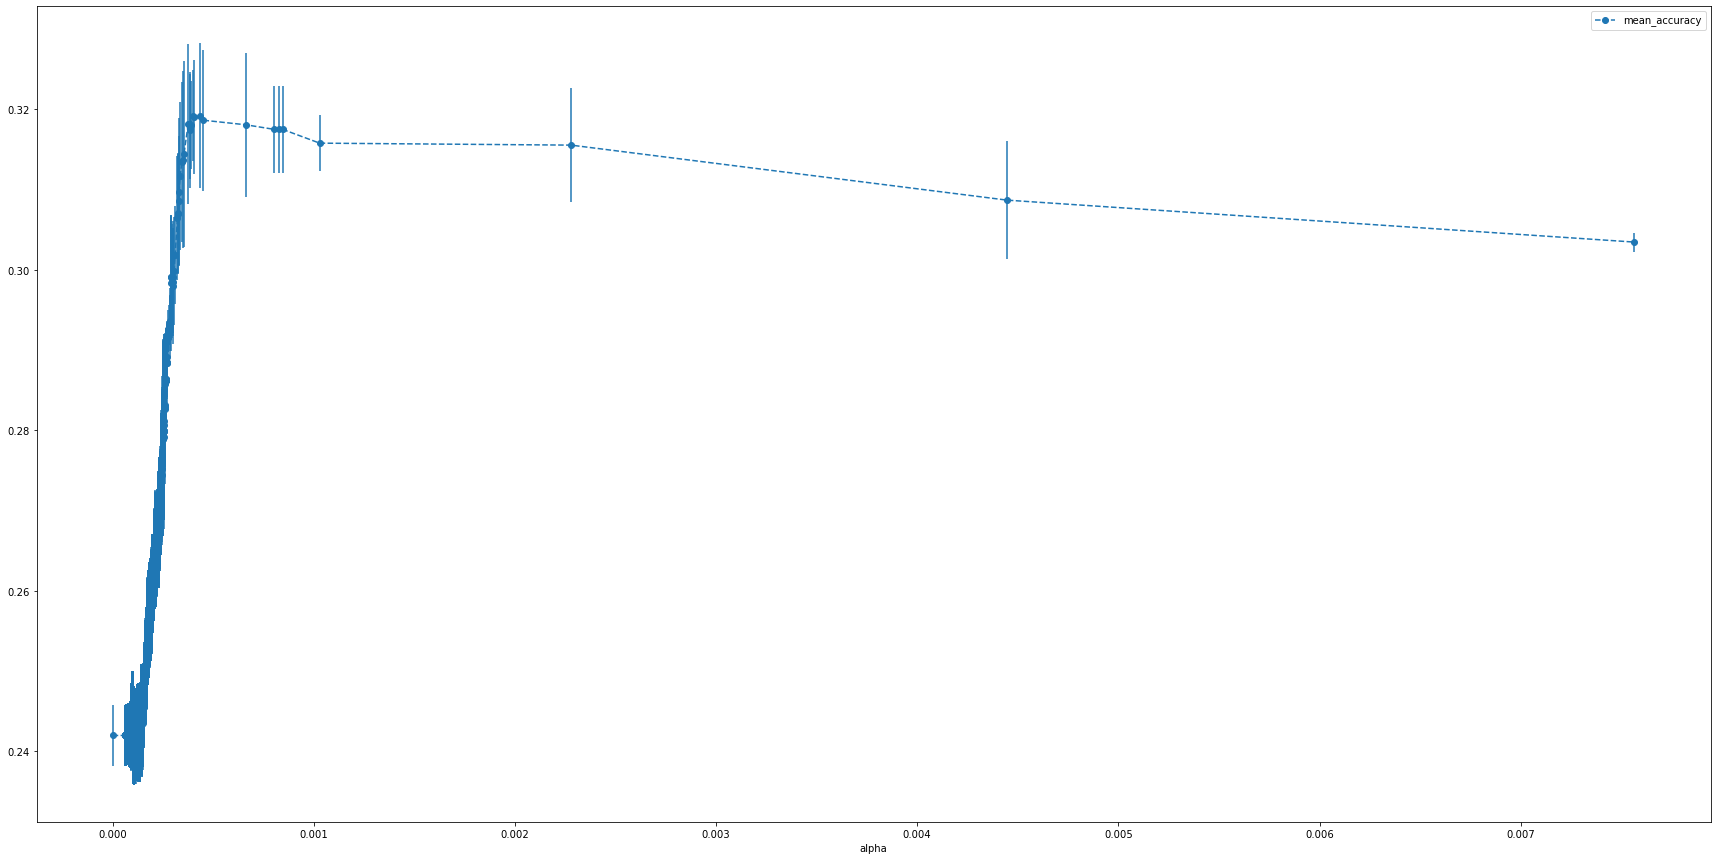

In [21]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                  y='mean_accuracy',
                  yerr= 'std',
                  marker='o',
                  linestyle='--',
                  figsize=(30, 15))

In [ ]:
from sklearn.metrics import accuracy_score

pred = clf_df.predict(X_test)
accuracy_score(y_test, pred)

Criterion: defines what function will be used to measure the 
    quality of a split. The options are “gini” and “entropy”.
    
Max_depth: defines the maximum depth of the tree. If it’s “none”,
    the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model).

In [ ]:
clf_df = DecisionTreeClassifier(criterion='gini')
clf_df.fit(X_train, y_train)
pred = clf_df.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))

clf_df = DecisionTreeClassifier(criterion='entropy')
clf_df.fit(X_train, y_train)
pred = clf_df.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 clf_df = DecisionTreeClassifier(criterion=’gini’, max_depth=i)
 clf_df.fit(X_train, y_train)
 pred = clf_df.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 clf_df = DecisionTreeClassifier(criterion=’entropy’, max_depth=i)
 clf_df.fit(X_train, y_train)
 pred = clf_df.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({‘acc_gini’:pd.Series(acc_gini), 
 ‘acc_entropy’:pd.Series(acc_entropy),
 ‘max_depth’:pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot(‘max_depth’,’acc_gini’, data=d, label=’gini’)
plt.plot(‘max_depth’,’acc_entropy’, data=d, label=’entropy’)
plt.xlabel(‘max_depth’)
plt.ylabel(‘accuracy’)
plt.legend()